In [16]:
import pandas as pd

# Load the dataset
file_path = '/Users/syedmohathashimali/Pratice/laptops.csv'  # Update the path if needed
df = pd.read_csv(file_path)

In [17]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [18]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


count    2160.000000
mean     1312.638509
std       911.475417
min       201.050000
25%       661.082500
50%      1031.945000
75%      1708.970000
max      7150.470000
Name: final_price, dtype: float64
Skewness: 1.6495877663192549
Kurtosis: 3.4413581896137564


/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/153386271.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['final_price'], shade=True)


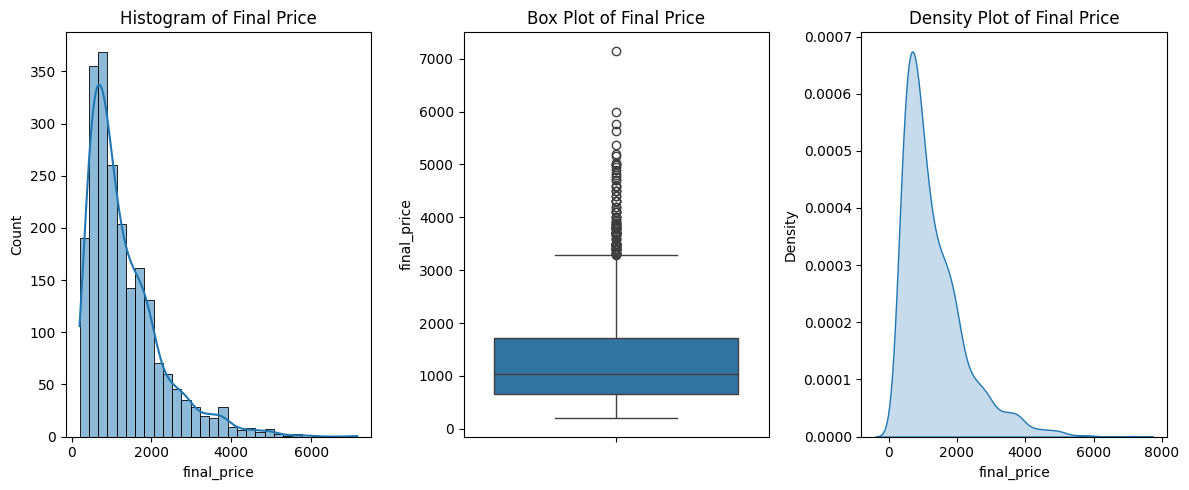

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Focusing only on the required columns
data = df[['ram', 'storage', 'screen', 'final_price']]

# Summary statistics
print(data['final_price'].describe())
print('Skewness:', data['final_price'].skew())
print('Kurtosis:', data['final_price'].kurtosis())

# Visualizations
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data['final_price'], bins=30, kde=True)
plt.title('Histogram of Final Price')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(y=data['final_price'])
plt.title('Box Plot of Final Price')

# Density Plot
plt.subplot(1, 3, 3)
sns.kdeplot(data['final_price'], shade=True)
plt.title('Density Plot of Final Price')

plt.tight_layout()
plt.show()


In [20]:
# Check for missing values in the specified columns
missing_values = data[['ram', 'storage', 'screen', 'final_price']].isnull().sum()

# Display the missing values count for each column
print(missing_values)

ram            0
storage        0
screen         4
final_price    0
dtype: int64


In [21]:
ram_median = data['ram'].median()

print('Median for ram:', ram_median)

Median for ram: 16.0


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Split the data into features (X) and target (y)
X = data[['ram', 'storage', 'screen']]
y = data['final_price']

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Option 1: Fill missing values in 'screen' with 0
X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

# Train model for Option 1
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

# Predictions and RMSE for Option 1
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))

In [24]:
print("RMSE when filling with 0:", round(rmse_0, 2))

RMSE when filling with 0: 624.88


In [25]:
# Option 2: Fill missing values in 'screen' with the mean of the training set
mean_screen = X_train['screen'].mean()
X_train_mean = X_train.fillna(mean_screen)
X_val_mean = X_val.fillna(mean_screen)

# Train model for Option 2
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

# Predictions and RMSE for Option 2
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))


In [26]:
print("RMSE when filling with mean:", round(rmse_mean, 2))

RMSE when filling with mean: 625.51


## RMSE with 0  is input is Better 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np



# Fill missing values in 'screen' with 0
data['screen'].fillna(0, inplace=True)

# Split the data into features (X) and target (y)
X = data[['ram', 'storage', 'screen']]
y = data['final_price']

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# List of regularization strengths
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Store RMSE for each r
rmse_scores = {}

# Evaluate each r value
for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    
    # Predictions and RMSE
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Round RMSE and store it
    rmse_scores[r] = round(rmse, 2)

# Output RMSE scores
for r, score in rmse_scores.items():
    print(f"RMSE for r={r}: {score}")

# Identify the best r value with the smallest RMSE
best_r = min(rmse_scores, key=lambda k: (rmse_scores[k], k))
best_rmse = rmse_scores[best_r]

print(f"Best r: {best_r} with RMSE: {best_rmse}")


RMSE for r=0: 624.88
RMSE for r=0.01: 624.88
RMSE for r=0.1: 624.88
RMSE for r=1: 624.88
RMSE for r=5: 624.88
RMSE for r=10: 624.87
RMSE for r=100: 624.84
Best r: 100 with RMSE: 624.84


/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/109021752.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['screen'].fillna(0, inplace=True)
/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/109021752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['screen'].fillna(0, inplace=True)


## Best r: 100 with RMSE: 624.84

In [29]:
data['screen'].fillna(0, inplace=True)

# List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

# Loop through each seed
for seed in seeds:
    # Split the data into features (X) and target (y)
    X = data[['ram', 'storage', 'screen']]
    y = data['final_price']
    
    # Split into training (60%), validation (20%), and test (20%) sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)  # 60% train
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)  # 20% val, 20% test

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions and RMSE for validation set
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Store the RMSE score
    rmse_scores.append(rmse)

# Calculate the standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores)

# Output the standard deviation rounded to 3 decimal places
print("Standard deviation of RMSE scores:", round(std_rmse, 3))

Standard deviation of RMSE scores: 35.825


/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/2959849878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['screen'].fillna(0, inplace=True)
/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/2959849878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['screen'].fillna(0, inplace=True)


In [31]:
# Split the data into features (X) and target (y) using seed 9
X = data[['ram', 'storage', 'screen']]
y = data['final_price']

# Split into training (60%) and test (40%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

# Fill missing values in 'screen' with 0
X_train['screen'].fillna(0, inplace=True)
X_test['screen'].fillna(0, inplace=True)

# Train the Ridge regression model with r = 0.001
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)

# Predictions on the test dataset
y_pred = model.predict(X_test)

# Calculate RMSE on the test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the RMSE
print("RMSE on the test dataset:", round(rmse_test, 2))


RMSE on the test dataset: 612.86


/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/929545160.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['screen'].fillna(0, inplace=True)
/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_24854/929545160.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav